In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from glob import glob
import cv2 as cv

In [4]:
import sys
import os

from sklearn.model_selection import train_test_split

In [5]:
path1 = 'H:/Arjun Files/Deeplearning Udemy Datasets/Convolutional_Neural_Networks/dataset/test_set/'
test = os.listdir(path1)

In [6]:
path2 = 'H:/Arjun Files/Deeplearning Udemy Datasets/Convolutional_Neural_Networks/dataset/training_set/'
train = os.listdir(path2)

In [7]:
train

['cats', 'dogs']

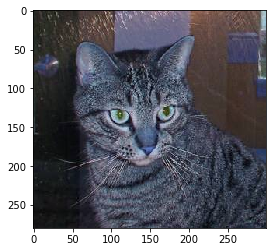

In [8]:
image = cv.imread(os.path.join(path2+'cats/'+'cat.1.jpg'))
plt.imshow(image)
plt.show()

In [9]:
# useful for getting number of files
image_files = glob(path2 + '/*/*.jpg')
valid_image_files = glob(path1 + '/*/*.jpg')

len(image_files)

8000

In [10]:
input_shape=[256,256]

ptm = PretrainedModel ( input_shape = input_shape +[3], weights = 'imagenet', include_top =False)

In [11]:
# freeze pretrained model weights

ptm.trainable = False

In [12]:
K = len(train)
K

2

In [13]:
x = Flatten()(ptm.output)
x = Dense (K, activation = 'softmax')(x)

model = Model(inputs =ptm.input, outputs = x)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [15]:
model.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
gen_train = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input                           
    )

In [17]:
gen_test = ImageDataGenerator(preprocessing_function=preprocess_input)

In [18]:
batch_size = 64

In [19]:
train_gen = gen_train.flow_from_directory(path2, target_size = input_shape, batch_size = batch_size)

Found 8000 images belonging to 2 classes.


In [20]:
test_gen = gen_test.flow_from_directory(path1, target_size = input_shape, batch_size = batch_size)

Found 2000 images belonging to 2 classes.


In [21]:
r = model.fit_generator ( train_gen, 
                         validation_data = test_gen, 
                         epochs = 5, 
                         steps_per_epoch=int(np.ceil(len(image_files) // batch_size)),
                         validation_steps=int(np.ceil(len(valid_image_files) // batch_size))  )

Epoch 1/5
125/125 [==============================] - 6442s 52s/step - loss: 1.8317 - accuracy: 0.8741 - val_loss: 0.3415 - val_accuracy: 0.9743
Epoch 2/5
125/125 [==============================] - 6310s 50s/step - loss: 0.5620 - accuracy: 0.9590 - val_loss: 0.3342 - val_accuracy: 0.9763
Epoch 3/5
125/125 [==============================] - 6325s 51s/step - loss: 0.4716 - accuracy: 0.9666 - val_loss: 0.2676 - val_accuracy: 0.9814
Epoch 4/5
125/125 [==============================] - 6310s 50s/step - loss: 0.4398 - accuracy: 0.9688 - val_loss: 0.3313 - val_accuracy: 0.9763
Epoch 5/5
125/125 [==============================] - 6303s 50s/step - loss: 0.4785 - accuracy: 0.9666 - val_loss: 0.3579 - val_accuracy: 0.9753


In [22]:
model.save("transfer.h5")